# INTRODUCCIÓN

***************************************

# Paso 1: SETUP

## Importaciones  

Para la realización del ejercicio hemos importado las siguientes librerias.
- Numpy: Libreria dedicada a las operaciones matemáticas
- Pandas: Libreria dedicada al análisis de datos
- Matplotlib: Libreria dedicada a la visualización de datos mediante gráficas.
- Seaborn: Libreria basada en la anterior mencionada, Matplotlib, comunmente utilizada para una interfaz de alto nivel para crear gráficos atractivos y informativos.
- Plotly: Librería similar a Matplotlib, cumple la misma función. Sin embargo, estos gráficos que crean son interactivos. Se importa dentro de ella express, añadiendo la posibilidad de crear gráficos de área, puntos, entre otros, necesarios para la realización de las rectas de regresión lineal.

In [1]:
import numpy as np
import pandas as pd


# Librerias para la representación de graficas interactivas
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

print('Setup completado')

Setup completado


## Cargar datos

Nuestra fuente de datos se trata de un dataset en formato csv obtenido en Kaggle
- Link: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset


Comenzamos con la lectura del csv obtenido a través de la página web Kaggle. Distinguimos la separación de los datos, que en este caso se trata de ';'.<br/>
Con el comando .head() se imprimen los primeros 5 datos del csv.<br/>

In [2]:
df_cardio = pd.read_csv('data/cardio_train.csv', sep=";")

df_cardio.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

## Tipo Datos

Mediante la función .info() obtenemos la información acerca del tipo de datos que estamos manejando

In [3]:
df_cardio.info() # INFORMACIÓN DE LAS VARIABLES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Todas las características son de tipo numérico,es decir, todos son enteros, salvo una única variable: 'weight', siendo un número real.


A continuación se realiza la comprobación para obtener si hay **datos nulos** en nuestro Dataset. Si los hubiese, se eliminarian. En este caso, no se encuentran datos nulos.<br/>

In [4]:
nulos = df_cardio.isna().sum()
nulos


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [5]:
df_cardio.isnull().values.any()

False

## Estadísticas

**CAMBIO DE EDADES**

En nuestro dataset la edad se encuentra en días, vamos a ponerlo en años para que sea más comprensible. Para ello, realizaremos la división entera (//) de toda la columna 'age' entre 365, quedando un número entero como resultado.

In [6]:
df_cardio["age"] = df_cardio["age"] // 365

df_cardio.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [7]:
# estadísticas de los datos
df_cardio.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900     52.840671      1.349571    164.359229     74.205690   
std    28851.302323      6.766774      0.476838      8.210126     14.395757   
min        0.000000     29.000000      1.000000     55.000000     10.000000   
25%    25006.750000     48.000000      1.000000    159.000000     65.000000   
50%    50001.500000     53.000000      1.000000    165.000000     72.000000   
75%    74889.250000     58.000000      2.000000    170.000000     82.000000   
max    99999.000000     64.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

## Gráficas generales

Antes de comenzar la limpieza haremos una copia de seguridad de los datos originales para poder conservalos y que no sean modificados.

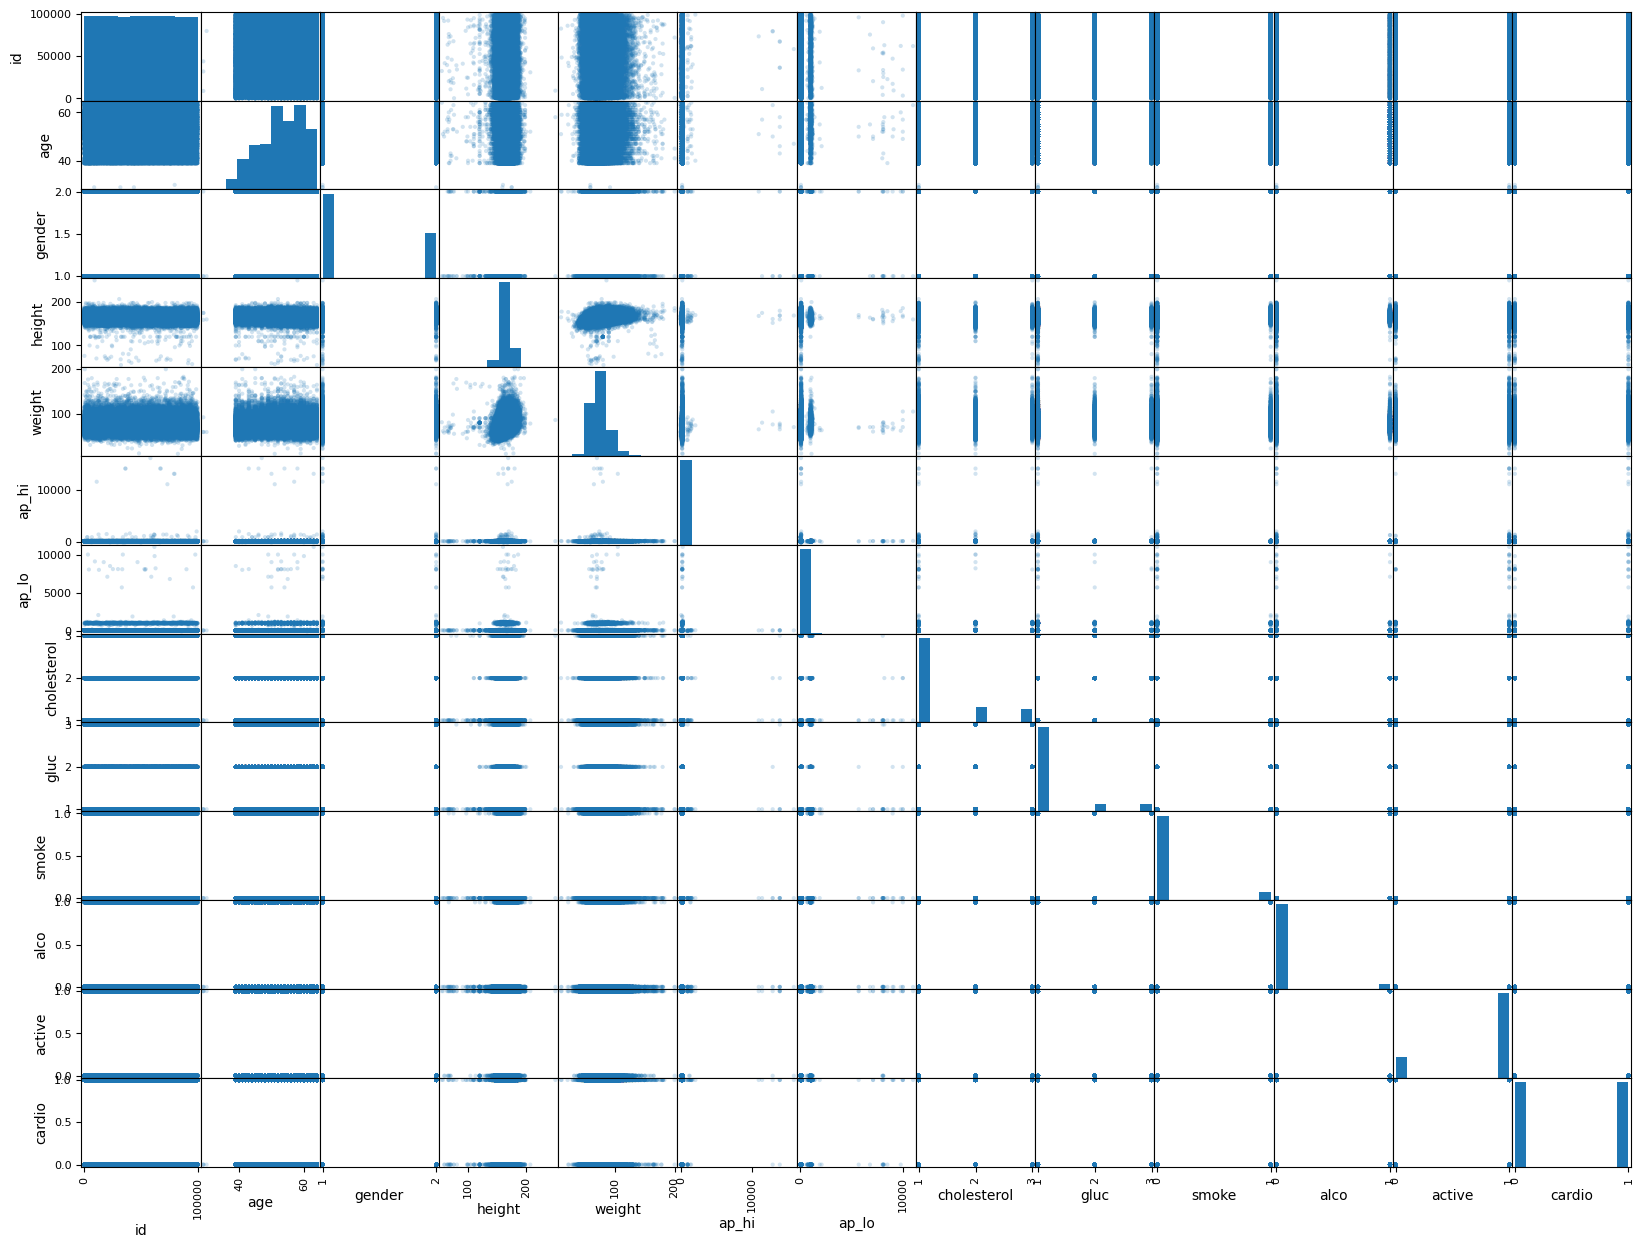

In [8]:
pd.plotting.scatter_matrix(df_cardio, figsize=(20, 15), alpha=0.2);

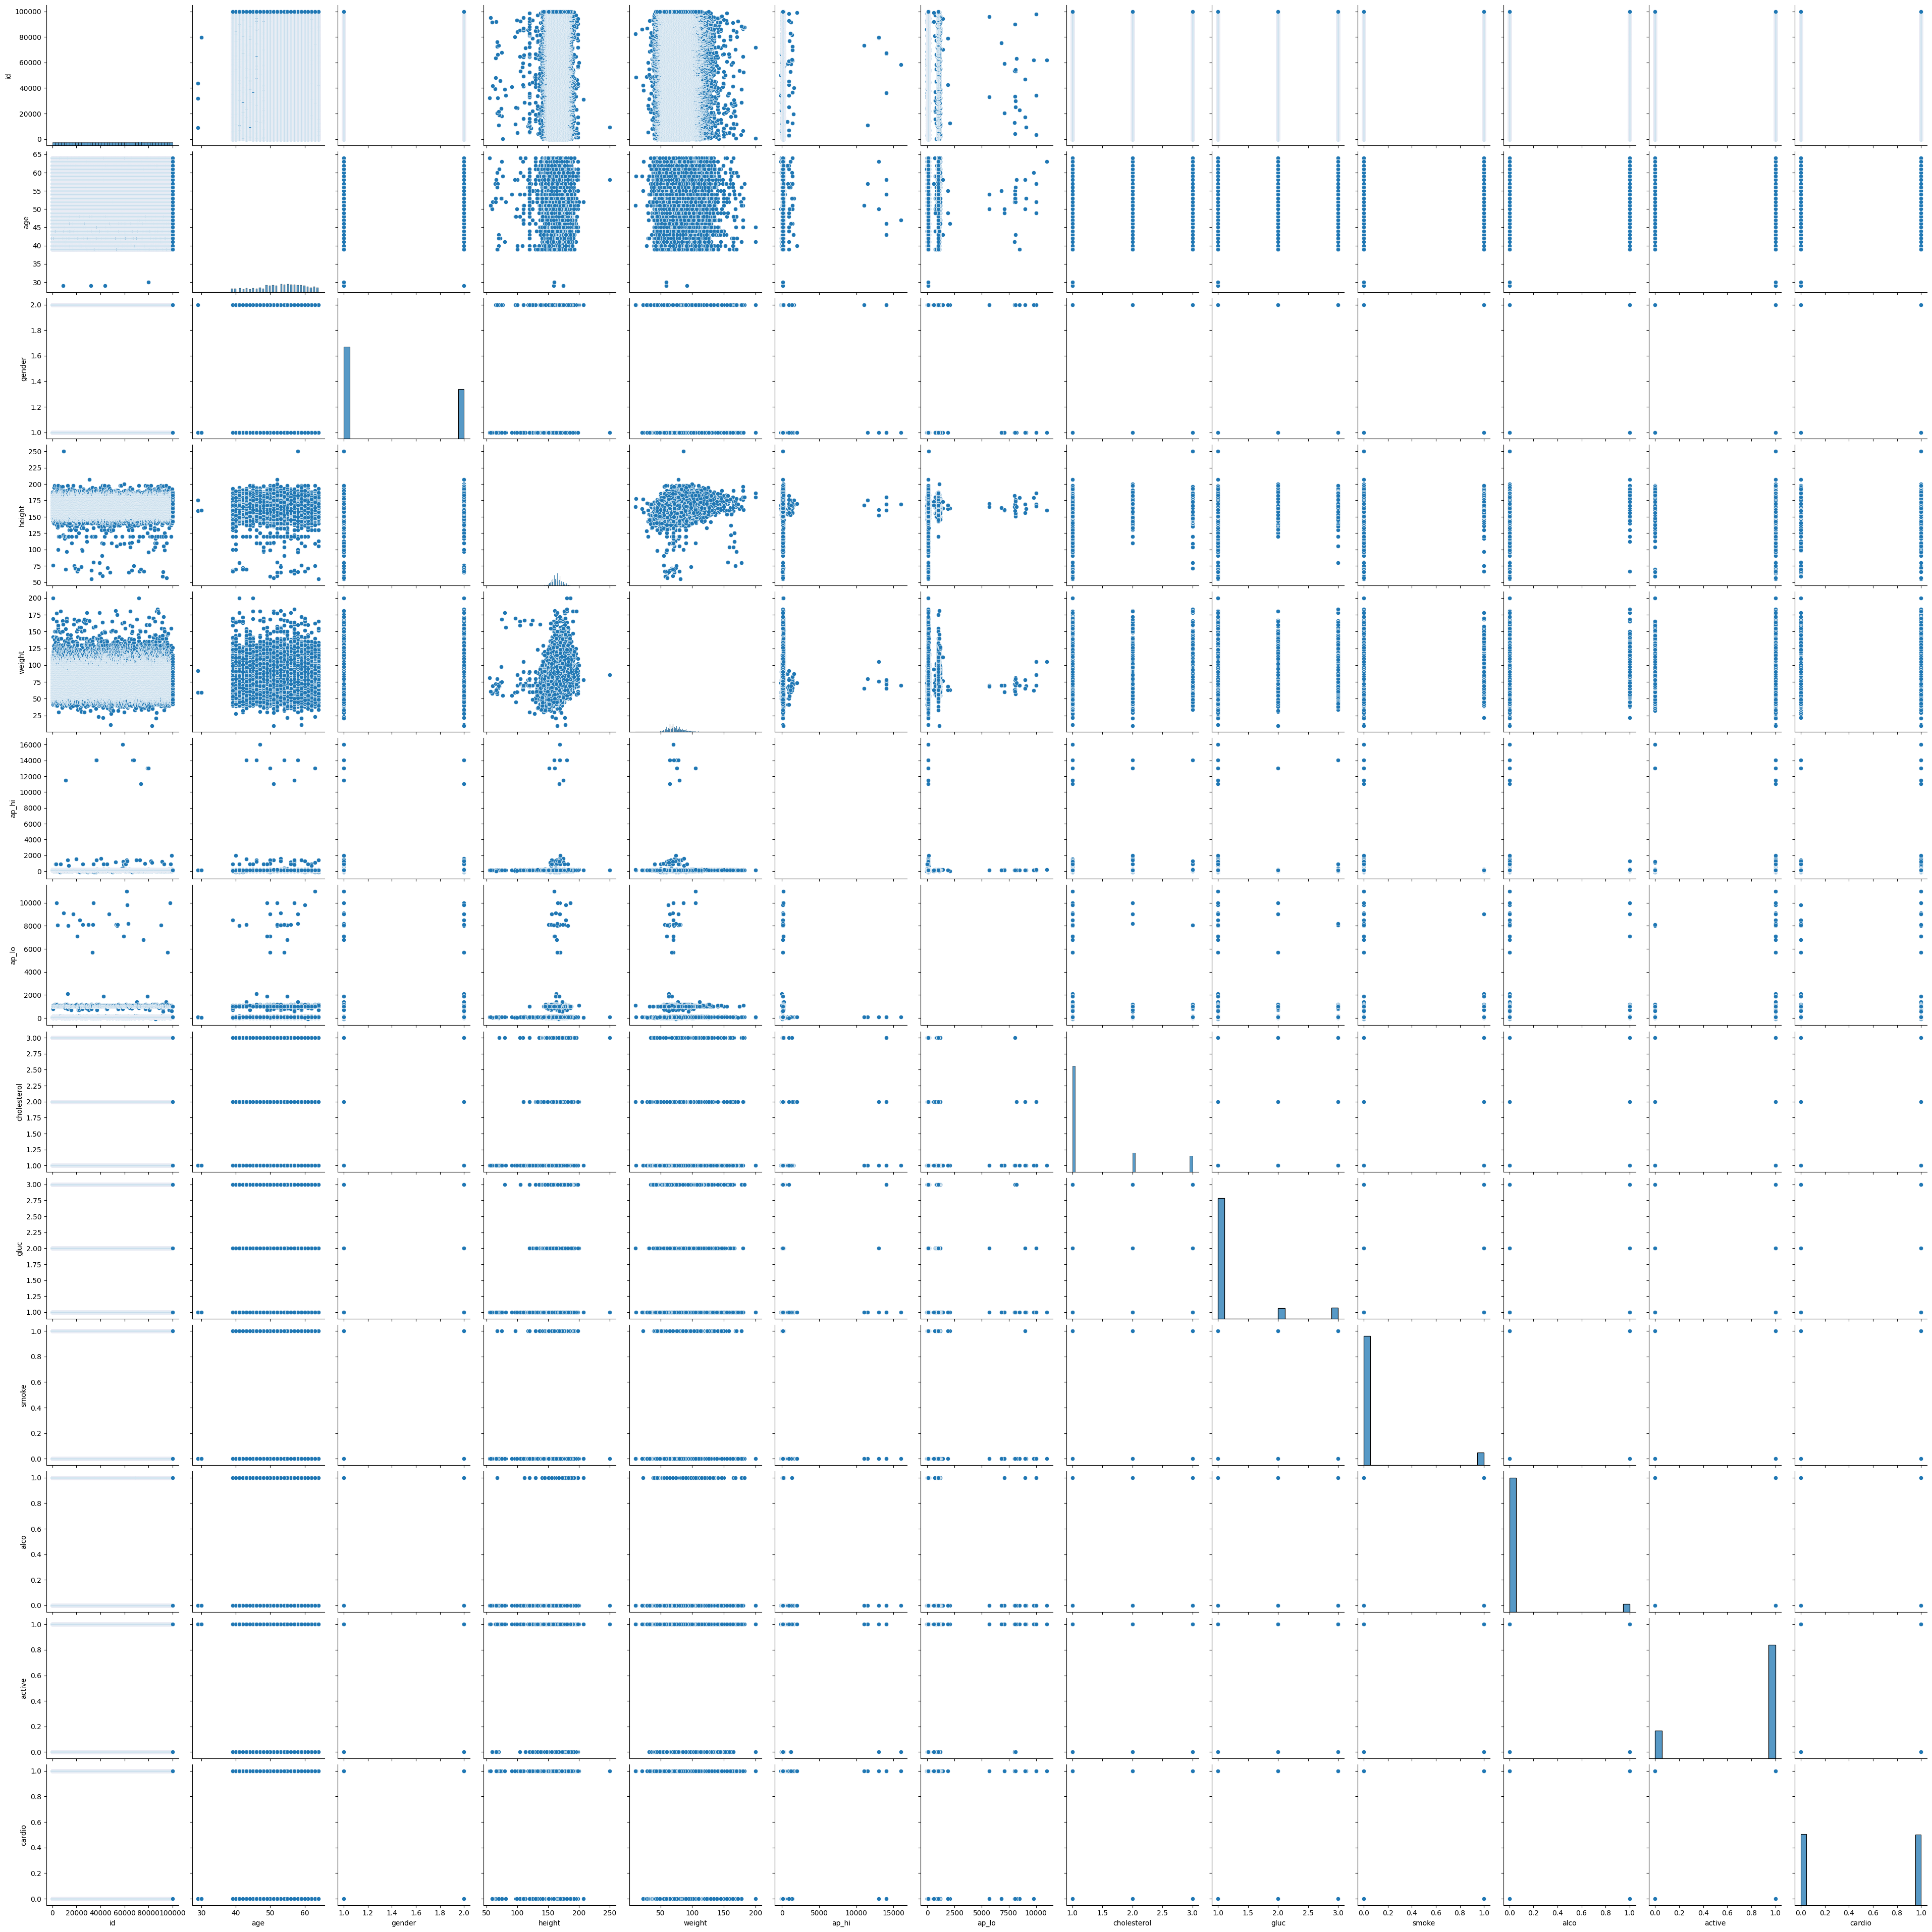

In [9]:
sns.pairplot(df_cardio, height=3)

In [10]:
df_cardio_original = df_cardio.copy()
#df.shape(), df_og.shape()

#Paso 2: FILTRADO
Estudiaremos las variables de nuestro dataset y filtraremos los datos duplicados, incoherentes e irrelevantes.

## Eliminar Duplicados



Primeramente, no es necesario la columna del 'id' así que la quitaremos.

In [11]:
df_cardio.drop(columns=['id'], inplace=True)

Mediante el siguiente método, miraremos con la función duplicated(), que devuelve un bool las filas que están duplicadas. Con la función sum, se sumarian todas las filas que fuesen nulas. Tras ello, se define un condicional en el que si la suma total de filas duplicadas es mayor que 0 entonces devuelve el total de filas duplicadas, sino diría que no hay ninguna

In [12]:
duplicate_sum = df_cardio.duplicated().sum()
if duplicate_sum > 0:
    print(f'Total de filas duplicadas: {duplicate_sum}')
else:
    print('No se encuentran filas duplicadas')

Total de filas duplicadas: 3208


Tras ello, hemos obtenido que sí se encuentran filas duplicadas así que vamos a mostras algunas de ellas, ordenando el dataset según género, altura y peso.

In [13]:
duplicated = df_cardio[df_cardio.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['gender', 'height', 'weight'], ascending= False)

duplicated.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
41915   52       2     186    80.0    120     80            1     1      0   
48830   52       2     186    80.0    120     80            1     1      0   
23200   57       2     180   100.0    120     80            1     1      0   
61467   57       2     180   100.0    120     80            1     1      0   
10389   40       2     180    80.0    120     80            1     1      0   

       alco  active  cardio  
41915     0       1       0  
48830     0       1       0  
23200     0       1       0  
61467     0       1       0  
10389     0       1       0

A continuación, eliminaremos las filas duplicadas conservando una de ellas. Tras ello, imprimiremos el total de datos restantes junto al total de características.

In [14]:
df_cardio.drop_duplicates(keep = 'first', inplace = True)
print('Total filas: {} \nTotal columnas: {}'.format(df_cardio.shape[0], df_cardio.shape[1]))

Total filas: 66792 
Total columnas: 12


Ahora si que podemos afirmar, que no se encuentran datos duplicados

In [15]:
df_cardio.duplicated().sum() #COMPROBACIÓN

0

## Eliminar columnas constantes

Las columnas constantes  o de baja varianza deben de ser eliminadas ya que no aportan información útil para el análisis de datos.  

- *Columnas constantes*: Columnas que tienen el mismo valor en otras filas del dataset. No habría variabilidad en los datos.
- *Columnas de baja varianza*: Columnas con valores similares en la mayoria de las filas del dataset, contribuyendo una variabilidad mínima.

In [16]:
cte_column = []
for col in df_cardio:
  if df_cardio[col].std()==0: # Si la desviación estándar es 0, entonces es una constante
    cte_column.append('{}'.format(col))
  else:
    pass
df_cardio.drop(cte_column, axis=1, inplace=True)
print('Tamaño del dataset: ', df_cardio.shape)
print('Columnas constantes: ', len(cte_column))

Tamaño del dataset:  (66792, 12)
Columnas constantes:  0


En este caso, no habría columnas constantes.

## Variables contínuas
Son las categorías que tienen valores numéricos continuos. En el contexto del análisis de datos, suelen ser aquellas que se miden en una escala numérica.

Para la identificación de las variables contínuas se realiza un condicional dónde si tiene más de 25 valores únicos ya que estas variables suelen contener muchos valores únicos. Tras ello, se devuelve una lista con estas variables.

In [17]:
v_continuas = []
v_categorica = []
for x in df_cardio:
  if len(df_cardio[x].unique())>25:
    v_continuas.append(x)
  else:
    v_categorica.append(x)
print('Variables continuas: {}'.format(v_continuas))

Variables continuas: ['age', 'height', 'weight', 'ap_hi', 'ap_lo']


Imprimimos solo las columnas de variable contínua junto a la descripción del dataset de esas columnas.

In [18]:
df_cardio[v_continuas].head()

age  height  weight  ap_hi  ap_lo
0   50     168    62.0    110     80
1   55     156    85.0    140     90
2   51     165    64.0    130     70
3   48     169    82.0    150    100
4   47     156    56.0    100     60

In [19]:
df_cardio[v_continuas].describe()

age        height        weight         ap_hi         ap_lo
count  66792.000000  66792.000000  66792.000000  66792.000000  66792.000000
mean      52.859729    164.341748     74.521160    129.231585     97.446221
std        6.803670      8.333904     14.580675    157.649354    192.906434
min       29.000000     55.000000     10.000000   -150.000000    -70.000000
25%       48.000000    159.000000     65.000000    120.000000     80.000000
50%       53.000000    165.000000     72.000000    120.000000     80.000000
75%       58.000000    170.000000     83.000000    140.000000     90.000000
max       64.000000    250.000000    200.000000  16020.000000  11000.000000

 Las observaciones anteriores ilustran algunos puntos clave sobre este conjunto de datos:
- Altura Mínima y Máxima suenan mal. Aunque el ser humano más pequeño y más alto miden 54,64 cm y 251,46 cm respectivamente, esto parece una especie de error.
-Se pueden hacer las mismas conclusiones para el peso mínimo.
-La presión arterial sistólica y la presión arterial diastólica no pueden ser negativas
Si la presión arterial sistólica y la presión arterial diastólica son más de 180 y 120 mmHg respectivamente, es un caso de emergencia. Aquí estamos tratando con 16020 mmHg y 11000 mmHg respectivamente, que parece bastante sospechoso
Esto significa que hay valores atípicos, es decir outliers.

### Eliminar datos atípicos
Los datos atípicos 'pesan' más que los cercanos a la media, por lo tanto es necesario deshacerse de ellos, ya que pueden influenciar enormemente los resultados.

Mediante los siguientes procesos, eliminaremos los datos atípicos, es decir, eliminaremos los datos que esten que esten o muy por encima o muy por debajo del rango de valores típicos.

Para ello existen distintas formas de hacerlo:
1. Z-Test
2. Diagramas de Caja-Bigotes
3. Rango del recorrido intercuartílico (RIQ)
4. Diagrama de dispersión

A continuación pondremos los diagramas de cajas de bigotes de cada variable contínua.

In [20]:
fig = go.Figure()

fig.add_trace(go.Box(x=df_cardio['height'], name = 'Altura', boxpoints='outliers',))
fig.add_trace(go.Box(x=df_cardio['weight'], name = 'Peso', boxpoints='outliers',))

fig.update_layout(title_text="Diagrama de caja-bigotes")
fig.show()

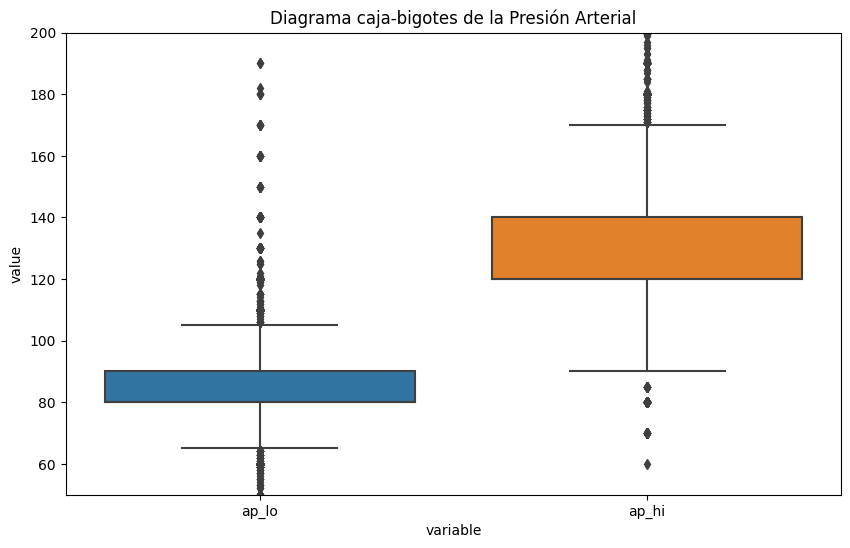

In [21]:
blood_pressure = df_cardio.loc[:,['ap_lo','ap_hi']]
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='variable', y='value', data=blood_pressure.melt())
ax.set_ylim([50, 200])
plt.title("Diagrama caja-bigotes de la Presión Arterial")
plt.show()


In [22]:
fig = go.Figure()

fig.add_trace(go.Box(x=df_cardio['age'], name = 'Edad', boxpoints='outliers',))

fig.update_layout(title_text="Diagrama de caja-bigotes")
fig.show()

**ELIINACIÓN POR CUARTILES: FÓRMULA GENERAL**

In [23]:
atipicos = []
for each_feature in df_cardio.columns:
    feature_data = df_cardio[each_feature]
    Q1 = np.percentile(feature_data, 25.) 
    Q3 = np.percentile(feature_data, 75.) 
    IQR = Q3-Q1 # recorrido intercuartílico
    outlier_step = IQR * 1.5 
    outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()

df_clean = df_cardio.drop(atipicos, axis=0, inplace=False)

In [24]:
df_clean.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   47       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0

**COMPROBACIÓN**

In [25]:
print(df_cardio.shape)
print(df_clean.shape)

(66792, 12)
(66792, 12)


## Variables categóricas
Estás representadas mediante números enteros, pero se tratan de variables clasificadas según grupos.

Posteriormente, mediante un condicional definimos en las variables contínuas que si la longitud de variables únicas era mayor a 25 entonces era continua. En caso contrario, nos encontramos ante variables categóricas

In [26]:
print('Las Varibales Categóricas son: {}'.format(v_categorica)) #FUNCIÓN DEFINIDA EN VARIABLES CONTINUAS (menor de 25)

Las Varibales Categóricas son: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [27]:
df_cardio[v_categorica].describe()

gender   cholesterol          gluc         smoke          alco  \
count  66792.000000  66792.000000  66792.000000  66792.000000  66792.000000   
mean       1.356210      1.382725      1.236106      0.092137      0.056294   
std        0.478882      0.690132      0.582063      0.289221      0.230491   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%        1.000000      1.000000      1.000000      0.000000      0.000000   
50%        1.000000      1.000000      1.000000      0.000000      0.000000   
75%        2.000000      2.000000      1.000000      0.000000      0.000000   
max        2.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  66792.000000  66792.000000  
mean       0.798539      0.511933  
std        0.401095      0.499861  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

Aquí imprimimos los valores numéricos que toman los grupos de las variables categóricas. De esta manera comprobamos si hubiese un número grande que pudiese provocar error en la codificación de la variable.

In [28]:
for each_feature in v_categorica:
    print('Total de variables categóricas en {} es de {}: {}'.format(each_feature, len(df_clean[each_feature].unique()), df_clean[each_feature].unique()))

Total de variables categóricas en gender es de 2: [2 1]
Total de variables categóricas en cholesterol es de 3: [1 3 2]
Total de variables categóricas en gluc es de 3: [1 2 3]
Total de variables categóricas en smoke es de 2: [0 1]
Total de variables categóricas en alco es de 2: [0 1]
Total de variables categóricas en active es de 2: [1 0]
Total de variables categóricas en cardio es de 2: [0 1]


Con la información de dataset recopilamos la siguiente información:
1. Gender [1: Mujer ; 2: Hombre]
2. Colesterol/Glucosa: [1: Normal ; 2: Por encima de lo normal: 3: Muy por encima de lo normal]
3. Resto: [1:si ; 0: no]

In [29]:
fig = make_subplots(rows=2, cols=3,subplot_titles=("Alcohol", "Género", "Colesterol", "Glucosa", "Fumador", "Ejercicio"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=['No alcohólico', 'Alcohólico'],values=df_clean['alco'].value_counts().values, name = 'Nivel de alcoholismo'), 1, 1)
fig.add_trace(go.Pie(labels=['Mujer', 'Hombre'],values=df_clean['gender'].value_counts().values, name = 'Género'), 1, 2)

fig.add_trace(go.Pie(labels=['Normal', 'Por encima de lo normal', 'Muy por encima de lo normal'],values=df_clean['cholesterol'].value_counts().values, name = 'Nivel de colesterol'), 1, 3)
fig.add_trace(go.Pie(labels=['Normal', 'Por encima de lo normal', 'Muy por encima de lo normal'],values=df_clean['gluc'].value_counts().values, name = 'Nivel de glucosa'), 2, 1)

fig.add_trace(go.Pie(labels=['No fumador', 'Fumador'],values=df_clean['smoke'].value_counts().values, name = 'Fumador'), 2, 2)
fig.add_trace(go.Pie(labels=['NNo realiza ejercicio', 'Realiza ejercicio'],values=df_clean['active'].value_counts().values, name = 'Nivel de ejercicio'), 2, 3)

fig.update_traces(hole=.4,)
fig.update_layout(title_text="Distribución de las variables categóricas")

fig.show()

No existen "valores atípicos" de estas categorías porque están asociadas a variables discretas que sólo pueden tomar determinados valores.

#Paso 3: ESTANDARIZACIÓN Y RELEVANCIA

In [30]:
from sklearn import decomposition #pca
from sklearn.preprocessing import StandardScaler # Standardization ((X - X_mean)/X_std)

## Análisis de Componentes Principales (PCA)
Técnica para reducir la dimensionalidad de dichos conjuntos de datos, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.

In [31]:
target_value = df_clean['cardio'] #VARIABLE OBJETIVO
features = df_clean.drop(['cardio'], axis=1) #VARIABLES A PREDECIR
features.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   47       1     156    56.0    100     60            1     1      0     0   

   active  
0       1  
1       1  
2       0  
3       1  
4       0

**Realización PCA:**  
Normalizar los valores de las variables continuas y clasificar los datos segun la variable objetivo almacenandolas en un nuveo dataframe donde "x" e "y" son las coordenadas de los puntos resultantes de aplicar PCA a los datos.

In [32]:
scaled_data = StandardScaler().fit_transform(features)

pca = decomposition.PCA()
pca.n_components = 2  # x, y
pca_data = pca.fit_transform(scaled_data)

pca_data = np.vstack((pca_data.T, target_value)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('x', 'y', 'label'))
pca_df.head()


x         y  label
0 -0.549796 -1.065475    0.0
1  0.995754  1.642042    1.0
2  0.873997  0.991218    1.0
3 -1.049684 -0.760822    1.0
4  1.515417 -1.222311    0.0

A continuación podemos ver todo nuestro dataset proyectado.

In [33]:
fig = go.Figure(data=go.Scattergl(
    x = pca_df['x'], 
    y = pca_df['y'],
    mode='markers',
    marker_color=pca_df['label']
))
fig.show()

## Selección de características relevantes

Tener características irrelevantes puede disminuir la precisión del modelo y hacer que cuando comience el machine learning aprenda en función de características irrelevantes.


In [34]:
df_clean.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   51       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   47       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0

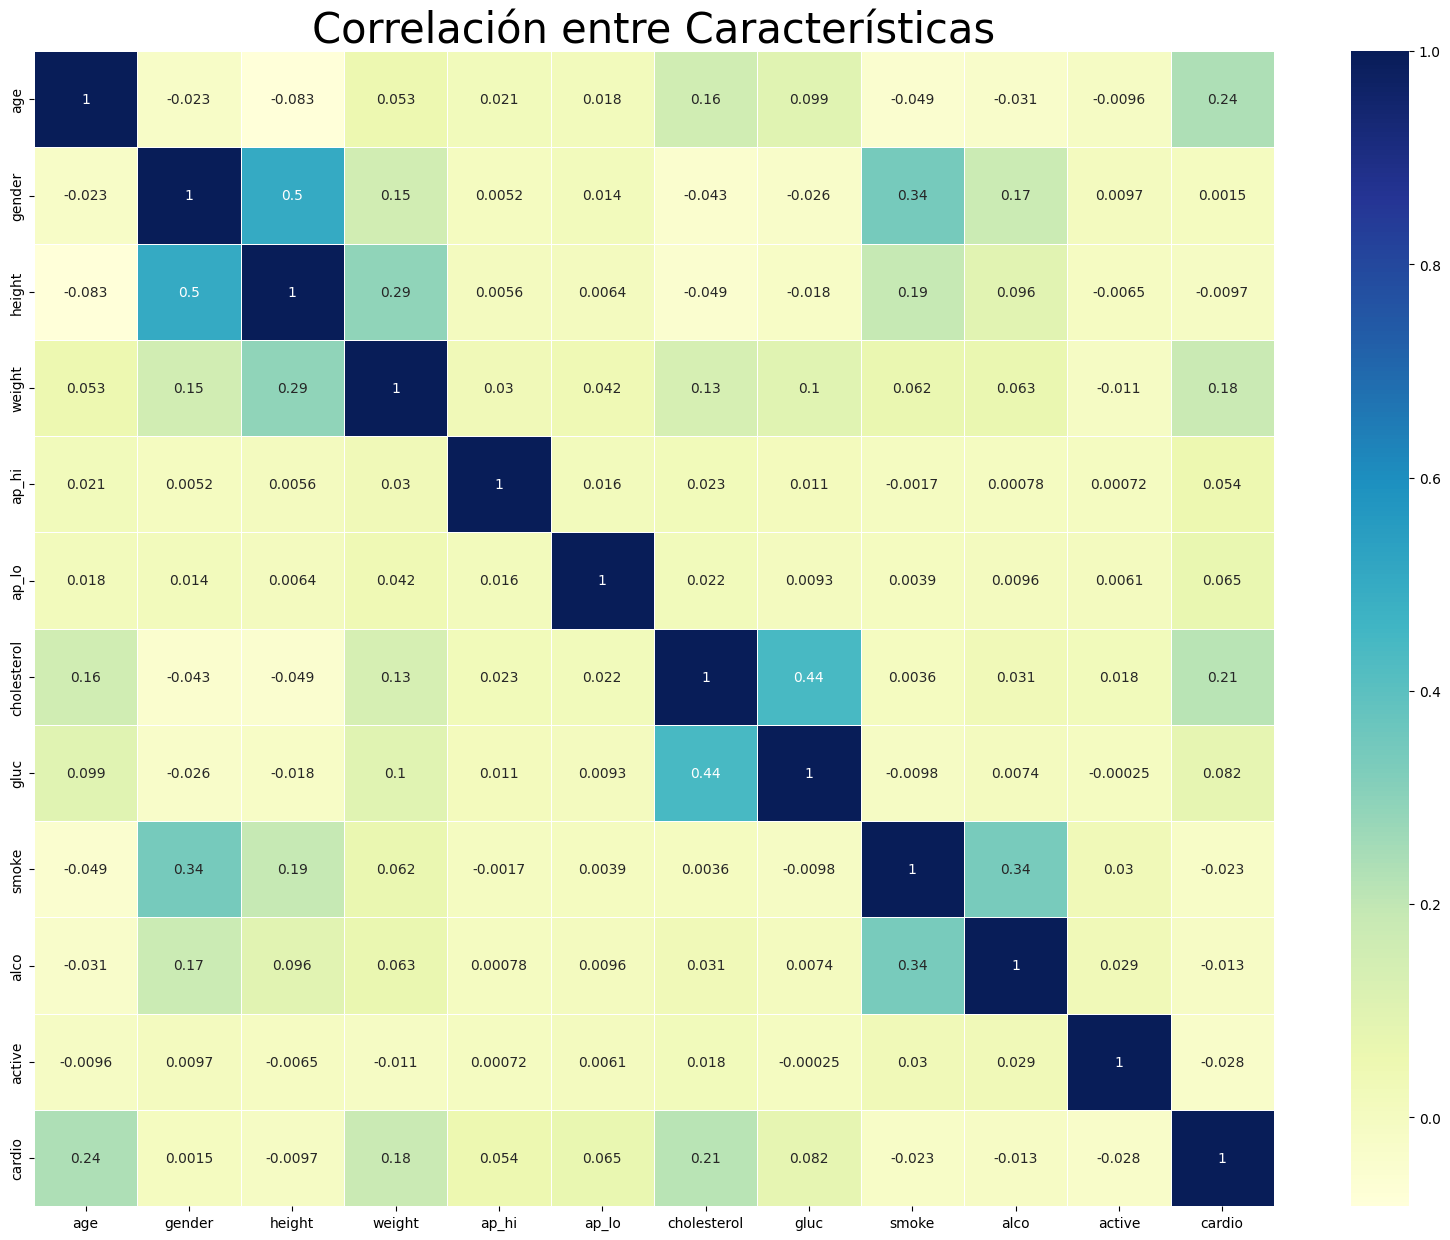

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df_clean.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlación entre Características', fontsize = 30)
plt.show()

Lo bueno es tener funciones con una buena cantidad de correlación con la función de destino.

La alta correlación dentro de las funciones independientes significa que ambas quieren representar lo mismo e incluso si elimina una de las funciones, no perderá muchos datos de calidad.

ap_hi tiene la correlación con bastantes características, pero dado que tiene la máxima correlación con el valor objetivo, no podemos permitirnos ignorarlo.

Caso similar pasa con ap_lo y con weight.

Características como height, smoke, alco, active tienen una correlación bastante baja con la característica de destino.

Preservando buenos datos, eliminaremos 'weight', 'gluc', 'gender', 'height', 'smoke', 'alco', 'active'



In [36]:
X = df_clean.drop(['cardio', 'weight', 'gluc', 'gender', 'smoke', 'alco', 'active'], axis =1)
Y = df_clean['cardio']

Tenemos múltiples características con varias escalas. No queremos que nuestro modelo dé prioridad a los valores más pequeños o más grandes solo por la diferencia de escala. Por lo tanto, el escalado de características se realiza durante el preprocesamiento de datos para manejar magnitudes, valores o unidades muy variables.

In [37]:
scaler = StandardScaler()
standard_X = scaler.fit_transform(X)

In [38]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_clean['age'], name = 'Age'))
fig.show()

In [39]:
fig = go.Figure(data=[go.Bar(x = df_clean[df_clean['cardio'] == 0]['age'].value_counts().index.to_list(), 
                             y =df_clean[df_clean['cardio'] == 0]['age'].value_counts().values, name = 'No Cardiopatía'),
                      go.Bar(x = df_clean[df_clean['cardio'] == 1]['age'].value_counts().index.to_list(), 
                             y =df_clean[df_clean['cardio'] == 1]['age'].value_counts().values, name = 'Cardiopatía')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribución de grupos de Edad según la variable objetivo", 
                  yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
    ),     xaxis=dict(
        title='Edad',
        titlefont_size=16,
        tickfont_size=14,
    ))
fig.show()

In [40]:
fig = go.Figure(data=[go.Bar(x = df_clean[df_clean['cardio'] == 0]['ap_hi'].value_counts().index.to_list(), 
                             y =df_clean[df_clean['cardio'] == 0]['ap_hi'].value_counts().values, name = 'No cardiopatía'),
                      go.Bar(x = df_clean[df_clean['cardio'] == 1]['ap_hi'].value_counts().index.to_list(), 
                             y =df_clean[df_clean['cardio'] == 1]['ap_hi'].value_counts().values, name = 'Cardiopatía')]
               )

fig.update_layout(
    barmode='group',
    xaxis_tickangle=-45,
    title_text="Distribución de Presión Sistólica agrupado según la variable objetivo",
    yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
        range=[0, 10000] # Rango en el eje y
    ),
    xaxis=dict(
        title='Presion Sistólica',
        titlefont_size=16,
        tickfont_size=14,
        range=[0, 250] # Rango en el eje x
    )
)

fig.show()

In [41]:
fig = go.Figure(data=[go.Bar(x = df_clean[df_clean['cardio'] == 0]['ap_lo'].value_counts().index.to_list(), 
                             y =df_clean[df_clean['cardio'] == 0]['ap_lo'].value_counts().values, name = 'No cardiopatía'),
                      go.Bar(x = df_clean[df_clean['cardio'] == 1]['ap_lo'].value_counts().index.to_list(), 
                             y =df_clean[df_clean['cardio'] == 1]['ap_lo'].value_counts().values, name = 'Cardiopatía')]
               )

fig.update_layout(barmode='group', xaxis_tickangle=-45, title_text="Distribución de Presión Diastólica según la variable objetivo", 
        yaxis=dict(
        title='Total',
        titlefont_size=16,
        tickfont_size=14,
        range=[0, 10000]

    ),     xaxis=dict(
        title='Presión Diastólica',
        titlefont_size=16,
        tickfont_size=14,
        range=[0, 200]
    ))

fig.show()

In [42]:
fig = go.Figure([go.Pie(labels=['No cardiopatía', 'Cardiopatía'],values=df_clean['cardio'].value_counts().values)])
fig.update_layout(title_text="Gráfico de la Variable Objetivo", template="plotly_white")
fig.data[0].marker.line.color = 'rgb(255, 255, 255)'
fig.data[0].marker.line.width = 2
fig.update_traces(hole=.4,)
fig.show()

#Paso 4: MACHINE LEARNING
Haremos el machine learning usando el modelo de Regresión Logística

In [43]:
# dividir la muestra en test y train
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(standard_X, Y, test_size=0.2, random_state=42, shuffle = True)

## Regresión Logística

In [44]:
# librerias necesarias para implementar el modelo de Regresion Logistica
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

Usaremos la regresión logística de la libería ***liblinear*** con penalización l2.

In [45]:
params_for_l2 = { 
    'C' :  np.logspace(0, 4, 10),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

In [46]:
logreg_with_l2 = LogisticRegression(penalty = 'l2', C = 1.0, solver = 'liblinear')
logreg_with_l2.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## Matriz de Confusión

In [47]:
from sklearn.metrics import classification_report # text report showing the main classification metrics
from sklearn.metrics import confusion_matrix #to get confusion_matirx 

In [48]:
scores = cross_val_score(logreg_with_l2, X_train, y_train, cv=10)
print(f'El modelo logístico con penalización L2 da una precisión promedio de {round(scores.mean()*100, 2)} % con un mínimo de {round(scores.min()*100, 2)} % y un máximo de {round(scores.max()*100, 2)} % de precisión')

El modelo logístico con penalización L2 da una precisión promedio de 71.55 % con un mínimo de 70.37 % y un máximo de 72.77 % de precisión


In [49]:
Y_hat = logreg_with_l2.predict(X_test)
print(classification_report(y_test, Y_hat))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72      6489
           1       0.74      0.69      0.71      6870

    accuracy                           0.71     13359
   macro avg       0.72      0.72      0.71     13359
weighted avg       0.72      0.71      0.71     13359



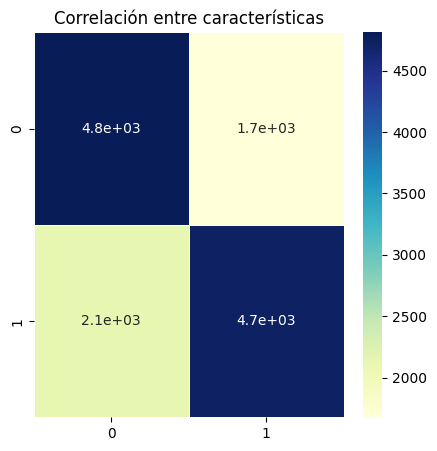

In [50]:
plt.rcParams['figure.figsize'] = (5, 5) 
sns.heatmap(confusion_matrix(y_test, Y_hat), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlación entre características')
plt.show()

In [51]:
print('Casos Positivos Verdaderos : {}'.format(confusion_matrix(y_test, Y_hat)[1][1]))
print('Casos Negativos Verdaderos : {}'.format(confusion_matrix(y_test, Y_hat)[0][0]))
print('Casos Positivos Falsos : {}'.format(confusion_matrix(y_test, Y_hat)[0][1]))
print('Casos Negativos Falsos : {}'.format(confusion_matrix(y_test, Y_hat)[1][0]))

Casos Positivos Verdaderos : 4732
Casos Negativos Verdaderos : 4812
Casos Positivos Falsos : 1677
Casos Negativos Falsos : 2138


# BIBLIOGRAFÍA
https://www.kaggle.com/code/rahulgulia/data-science-and-cardiovascular-diseases-cvds#Data-Analysis
